# Linear Regression

## Car Prices Assignment

### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

Essentially, the company wants —

- To identify the variables affecting car prices, e.g. fueltype, carbody, drivewheel, etc.


- To create a linear model that quantitatively relates car prices with variables such as fuel type, base of whel, number of doors, etc.


- To know the accuracy of the model, i.e. how well these variables can predict car prices.


#### So interpretation is important!


##  Reading and Understanding the Data

In [1]:
# Import the necessary libararies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('whitegrid')
%matplotlib inline

# Set the no of columns to be displayed to 500
pd.set_option('display.max_columns', 500)

# Set the no of rows to be displayed to 200
pd.set_option('display.max_rows', 200)

#set scientific noations 9.8e+11 to 9888777777.1245
pd.options.display.float_format = '{:.4f}'.format


# Import Libararies specific to Machine Learning/Linear Regression

import statsmodels.api as sm
import sklearn 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
####################### Define Global Variables ##################################

# Assign the path of the local dir to a variable. 
#This path must be updated, if the notebook is being executed on a different machine.

Local_Dir = r"C:\DS_Learning\Data_Science_IITB\Machine_Learning\Assignment\Linear_Regression"


# Store the name of the file in a variable. The file contanins the data about the Cars specification and their prices.
# The variable must be updated, if a different version of file being used


    lfile = r"\CarPrice_Assignment.csv"
Car_Dataset = str(Local_Dir + lfile)

In [4]:
#Read the car dataset and load it into a Dataframe df
df = pd.read_csv(Car_Dataset) 

In [5]:
# Get the basic information about the Dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [6]:
# Get the no of rows and columns
print('\t Car Dataset has {} rows and {} columns ..'.format(df.shape[0],df.shape[1]))

	 Car Dataset has 205 rows and 26 columns ..


In [7]:
# Print the datatype of each column of the dataframe
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Check For Missing Values
It seems, all the columns are populated, there are no NULL values in any of the columns.
Let's verify once

In [8]:
# Get the no of missing values in each column
Null_Pcent = round((df.isnull().sum(axis = 0)/len(df.index)*100),2)
print(Null_Pcent)

car_ID             0.0000
symboling          0.0000
CarName            0.0000
fueltype           0.0000
aspiration         0.0000
doornumber         0.0000
carbody            0.0000
drivewheel         0.0000
enginelocation     0.0000
wheelbase          0.0000
carlength          0.0000
carwidth           0.0000
carheight          0.0000
curbweight         0.0000
enginetype         0.0000
cylindernumber     0.0000
enginesize         0.0000
fuelsystem         0.0000
boreratio          0.0000
stroke             0.0000
compressionratio   0.0000
horsepower         0.0000
peakrpm            0.0000
citympg            0.0000
highwaympg         0.0000
price              0.0000
dtype: float64


## Observations

The above output confirms that all the columns are populated and there is no need to perform any missing 
values treatment/imputation

## Visualise the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 7200x7200 with 0 Axes>

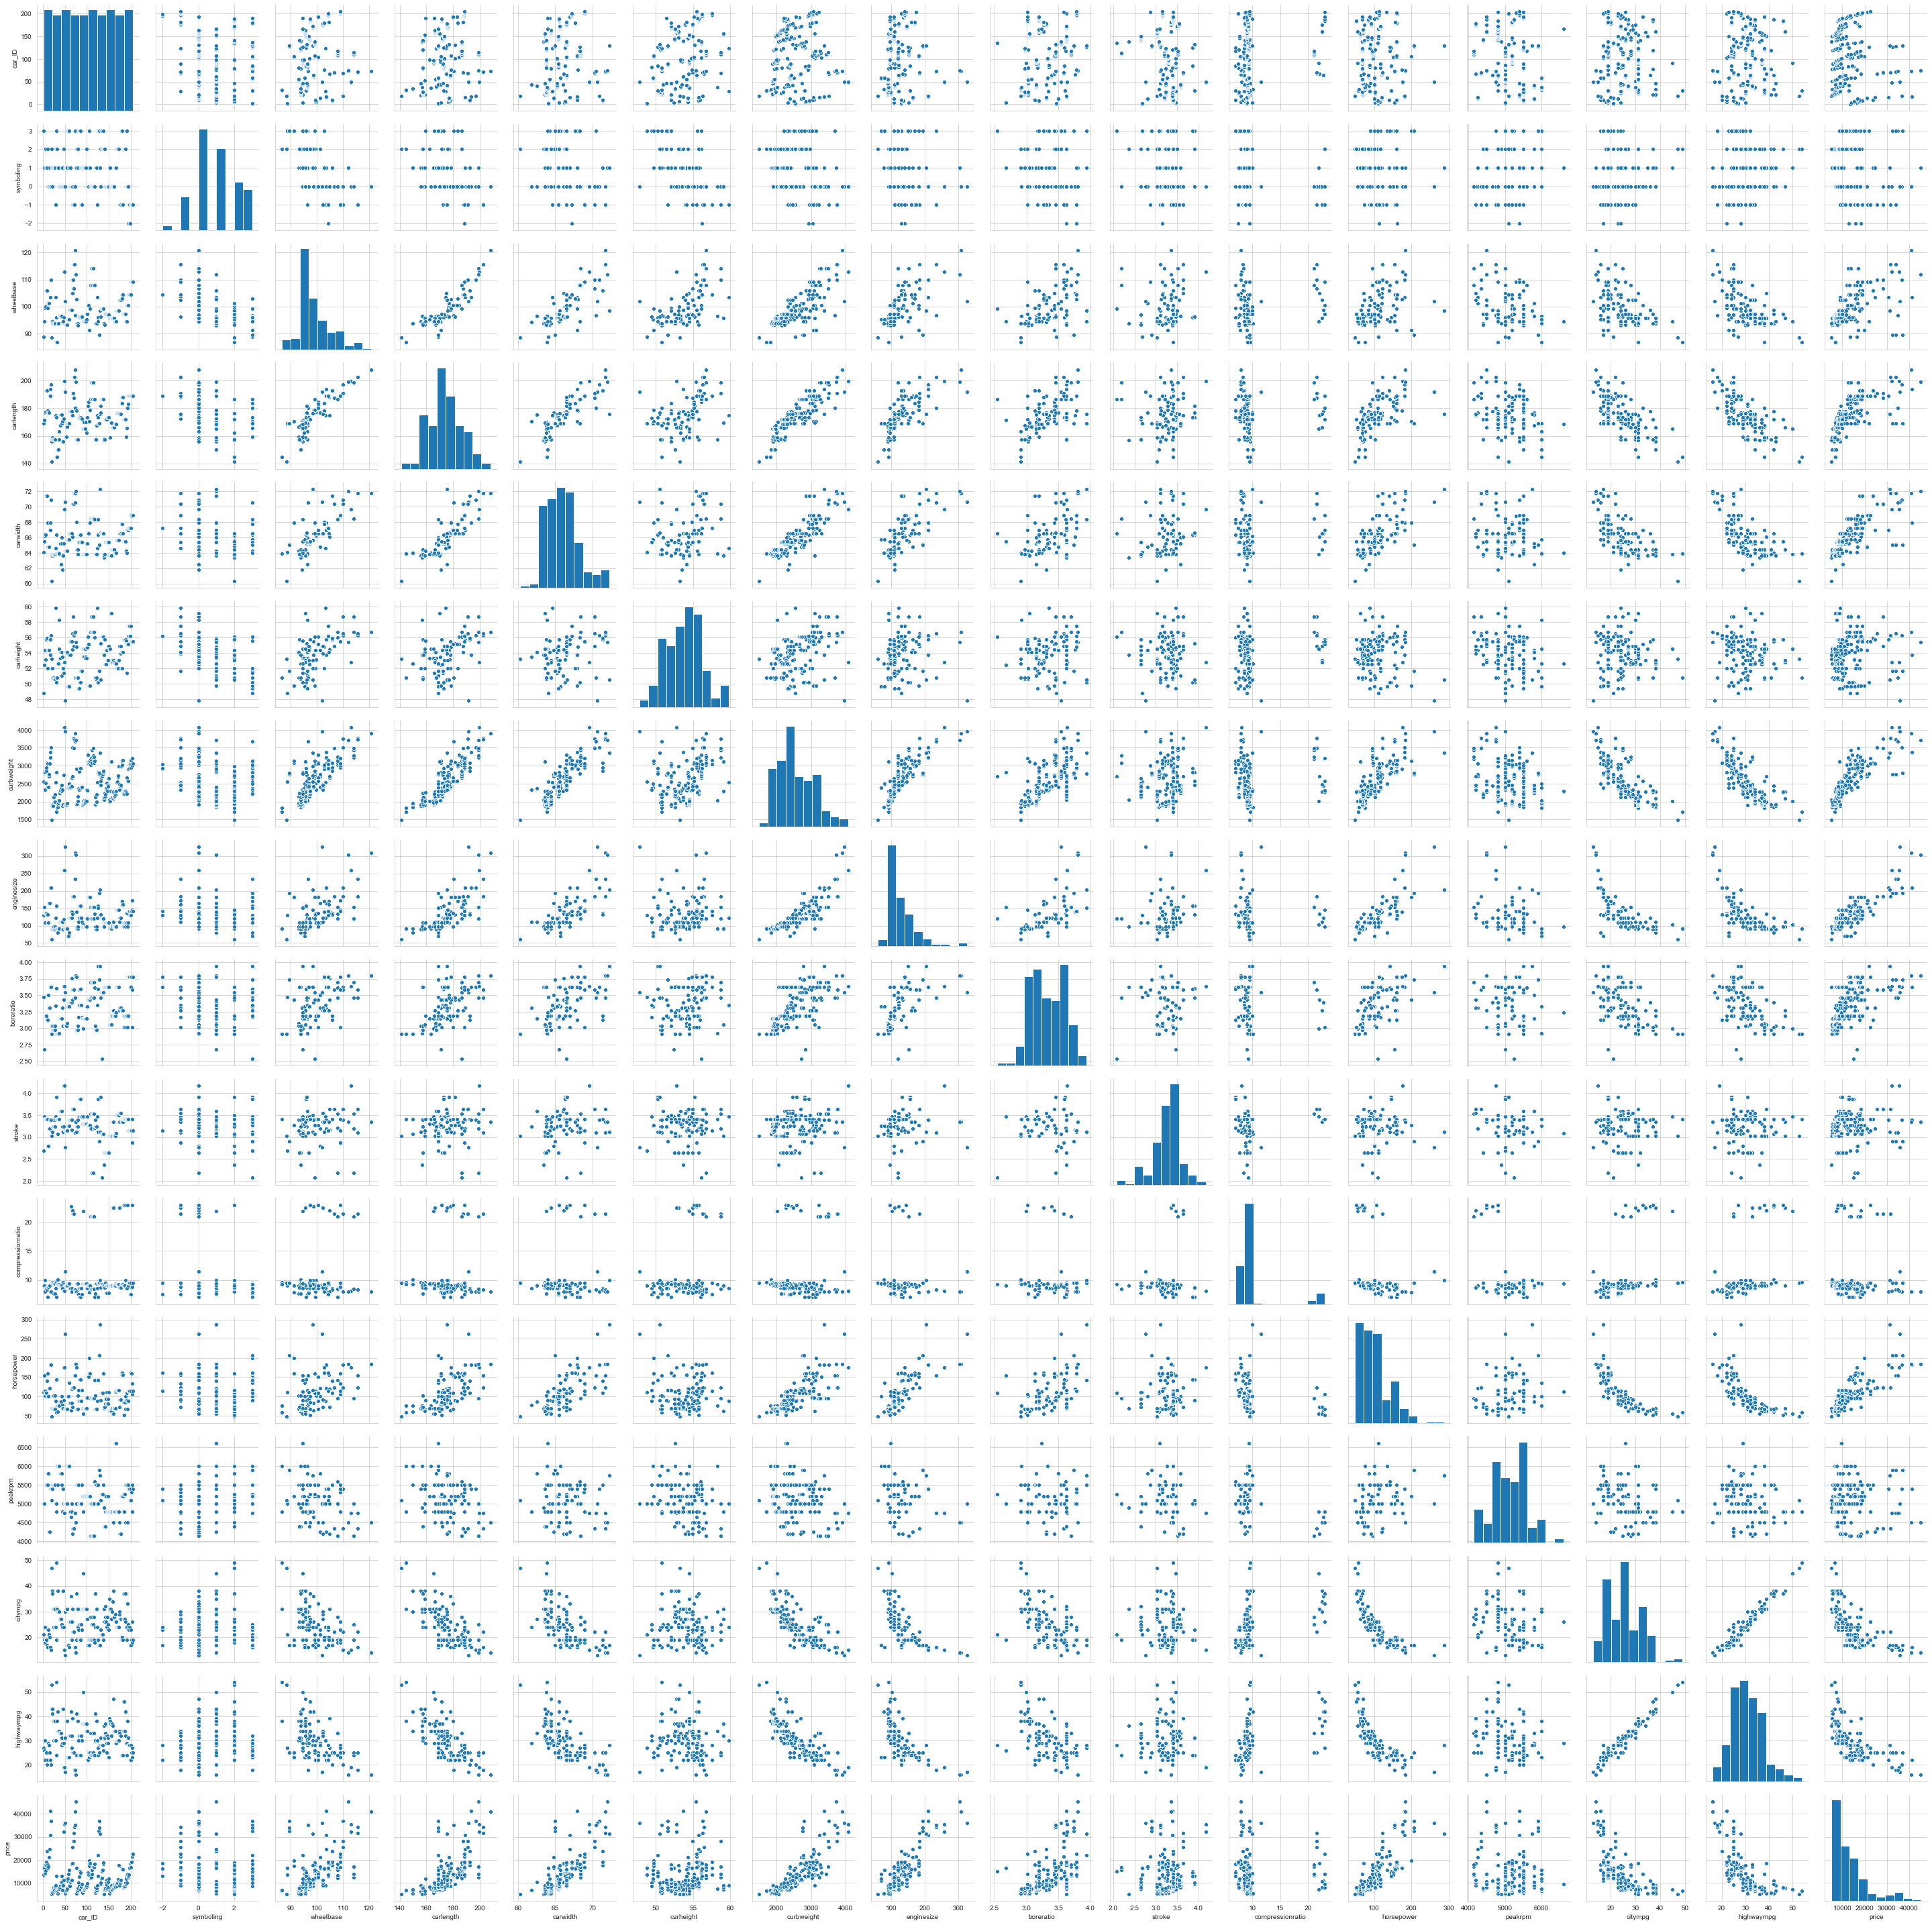

In [9]:
plt.figure(figsize=(100,100))
sns.pairplot(df)
plt.show()

## Observations
1. From the above graph, we can see that there is Linear correlation exists between `price` and independent variables such as `enginesize`, `horsepower`, `stroke`, `CarName_bmw`, `carlength`, `carwidth` etc
2. Based on the graph, we can use the Linear Regression to predict the Car Prices.


Let's check the corelation of all the Numerical variables

In [10]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.0000,-0.1516,0.1297,0.1706,0.0524,0.2560,0.0720,-0.0339,0.2601,-0.1608,0.1503,-0.0150,-0.2038,0.0159,0.0113,-0.1091
symboling,-0.1516,1.0000,-0.5320,-0.3576,-0.2329,-0.5410,-0.2277,-0.1058,-0.1301,-0.0087,-0.1785,0.0709,0.2736,-0.0358,0.0346,-0.0800
wheelbase,0.1297,-0.5320,1.0000,0.8746,0.7951,0.5894,0.7764,0.5693,0.4887,0.1610,0.2498,0.3533,-0.3605,-0.4704,-0.5441,0.5778
carlength,0.1706,-0.3576,0.8746,1.0000,0.8411,0.4910,0.8777,0.6834,0.6065,0.1295,0.1584,0.5526,-0.2872,-0.6709,-0.7047,0.6829
carwidth,0.0524,-0.2329,0.7951,0.8411,1.0000,0.2792,0.8670,0.7354,0.5591,0.1829,0.1811,0.6407,-0.2200,-0.6427,-0.6772,0.7593
carheight,0.2560,-0.5410,0.5894,0.4910,0.2792,1.0000,0.2956,0.0671,0.1711,-0.0553,0.2612,-0.1088,-0.3204,-0.0486,-0.1074,0.1193
curbweight,0.0720,-0.2277,0.7764,0.8777,0.8670,0.2956,1.0000,0.8506,0.6485,0.1688,0.1514,0.7507,-0.2662,-0.7574,-0.7975,0.8353
enginesize,-0.0339,-0.1058,0.5693,0.6834,0.7354,0.0671,0.8506,1.0000,0.5838,0.2031,0.0290,0.8098,-0.2447,-0.6537,-0.6775,0.8741
boreratio,0.2601,-0.1301,0.4887,0.6065,0.5591,0.1711,0.6485,0.5838,1.0000,-0.0559,0.0052,0.5737,-0.2550,-0.5845,-0.5870,0.5532
stroke,-0.1608,-0.0087,0.1610,0.1295,0.1829,-0.0553,0.1688,0.2031,-0.0559,1.0000,0.1861,0.0809,-0.0680,-0.0421,-0.0439,0.0794


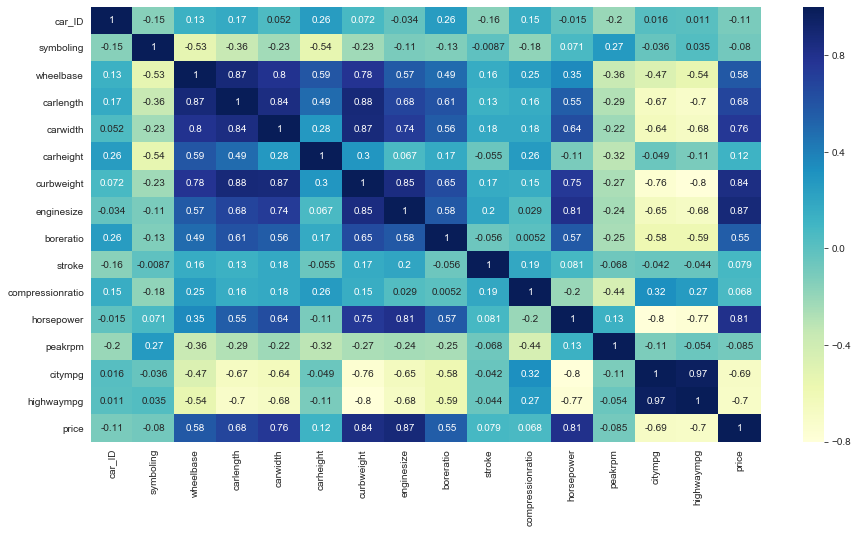

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

## Observations
1. There is significantly high positive correlation exists for `price` with `enginesize`(0.87), `carwidth`(0.76), `curbweight`(0.87).
2. There is a high positive correlation exists between`enginesize` and `curbweight`(0.85), `enginesize` and `horsepower`(0.81)
3. There is a good correlation exists between `enginesize` and `carlength`(0.61)
4. There is a very high positive correlation(0.97) exists `highwaympg` and `citympg`

#### Visualise Categorical Variables

Let's make boxplot for all the categorical variables

In [12]:
# Get categorical Variables
cat_var = df.select_dtypes(include = 'object').columns

In [13]:
def plot_catvar():
    l_row = len(cat_var)
    l_col = 2
    l_pos = 1
    fig = plt.figure(figsize=(15,40))
    for col in cat_var:
        if col != 'CarName':
            fig.add_subplot(l_row, l_col, l_pos)
            sns.boxplot(x = col, y = 'price', data = df)
            plt.yscale('log')
            l_pos = l_pos + 1
    plt.show()

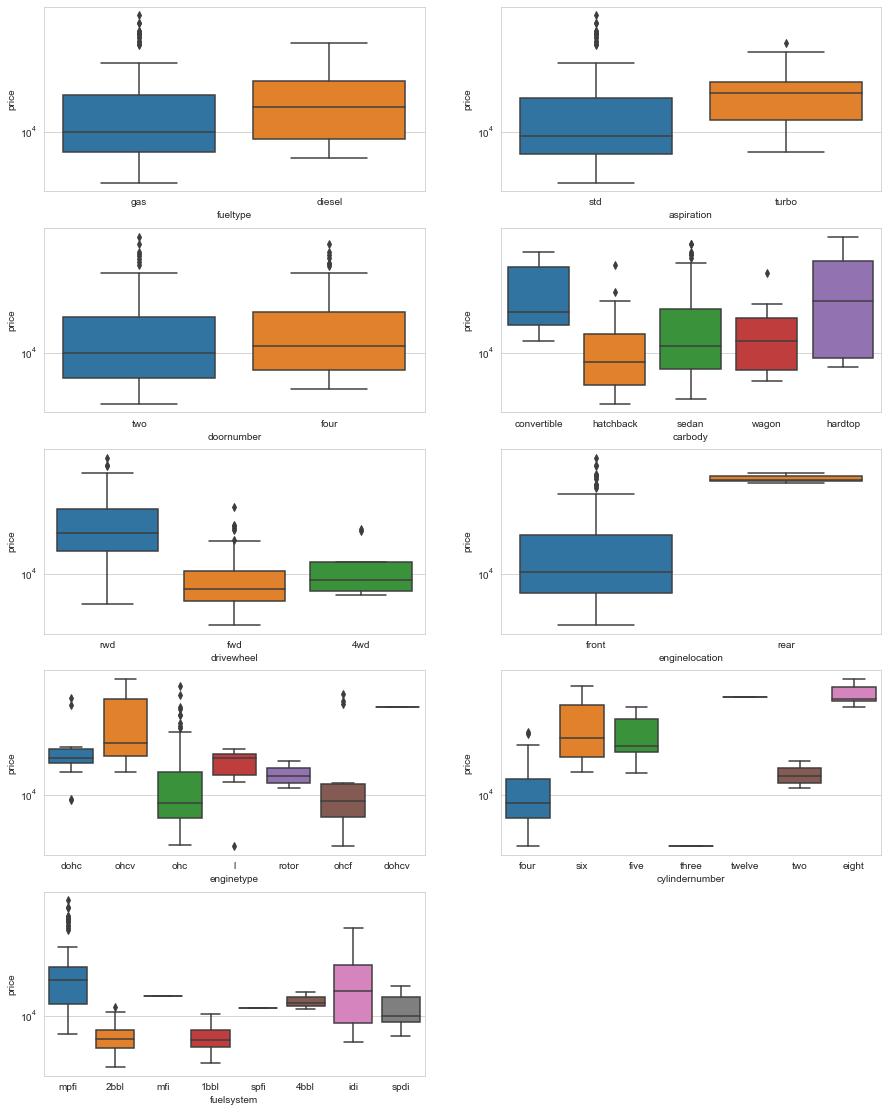

In [14]:
plot_catvar()

## Observations
1. There are outliers present in the variable such as `fueltype`, `aspirations`, `enginelocation`, `enginetype` etc, when plotted with `price`
2. Since, we have a limited dataset and as per the instruction, outliers are not to be removed. Therefore, there is no need to remove any records from the data set.

## Data Preparation

### Dealing with highly Correlated Variables
1. As evident from the heatmap, there is a high correlation between the variable `wheelbase`, `carlength`, `curbweight`, and `carwidth`. So, we can drop 3 of them.
2. Also, there is a very high correlation between `citympg` and `highwaympg`. Let's drop one of them.
3. `car_ID` can als be removed

In [15]:
df.drop(['wheelbase', 'curbweight', 'carwidth', 'highwaympg', 'car_ID'], axis = 1, inplace = True)

In [16]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,168.8000,48.8000,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,13495.0000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,168.8000,48.8000,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,16500.0000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,171.2000,52.4000,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,16500.0000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,176.6000,54.3000,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,13950.0000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,176.6000,54.3000,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,17450.0000


As per the requirement, only Company Name is to be taken as independent variable from CarName

In [17]:
# Let's remove the model from the CarName
df['CarName'] = df['CarName'].apply(lambda x: x.split(' ')[0])

In [18]:
# Check the unique values
df['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
mercury         1
toyouta         1
Nissan          1
porcshce        1
vokswagen       1
Name: CarName, dtype: int64

 There are some data quality issues, present in the CarName column, values such as toyouta, porcshce.
 Let's fix this.

In [19]:
df['CarName'] = df['CarName'].str.replace('porcshce', 'porsche')
df['CarName'] = df['CarName'].str.replace('Nissan', 'nissan')
df['CarName'] = df['CarName'].str.replace('toyouta', 'toyota')
df['CarName'] = df['CarName'].str.replace('vw', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('vokswagen', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('maxda', 'mazda')

In [20]:
# Check the unique values
df['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: CarName, dtype: int64

In [21]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8000,48.8000,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,13495.0000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8000,48.8000,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,16500.0000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,171.2000,52.4000,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,16500.0000
3,2,audi,gas,std,four,sedan,fwd,front,176.6000,54.3000,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,13950.0000
4,2,audi,gas,std,four,sedan,4wd,front,176.6000,54.3000,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,17450.0000


- As we can see that the dataset has many columns with two levels/categories.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

In [22]:
# Convert levels to binary
df['fueltype'] = df['fueltype'].map({'gas': 1, 'diesel': 0})
df['aspiration'] = df['aspiration'].map({'std': 1, 'turbo': 0})
df['doornumber'] = df['doornumber'].map({'two': 1, 'four': 0})
df['enginelocation'] = df['enginelocation'].map({'front': 1, 'rear': 0})

In [23]:
# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
carlength           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
dtypes: float64(6), int64(9), object(6)
memory usage: 33.7

There are few categorical variables, that have more than two levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [24]:
#Create dummy variables
df = pd.get_dummies(df)

In [25]:
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,168.8000,48.8000,130,3.4700,2.6800,9.0000,111,5000,21,13495.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,168.8000,48.8000,130,3.4700,2.6800,9.0000,111,5000,21,16500.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,171.2000,52.4000,152,2.6800,3.4700,9.0000,154,5000,19,16500.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,176.6000,54.3000,109,3.1900,3.4000,10.0000,102,5500,24,13950.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,176.6000,54.3000,136,3.1900,3.4000,8.0000,115,5500,18,17450.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## Split the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [26]:
# Split the dataset into train and test with 70% train and 30% test data
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.70, random_state = 100)

In [27]:
# Verify the split
print(df_train.shape)
print(df_test.shape)

(143, 67)
(62, 67)


### Rescale the variables using Normalisation(MinMaxScaler)

In [28]:
#create an instance of the class
scaler = MinMaxScaler()

In [29]:
# Get the columnsc to normaise, into a list

col_to_norm = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']

In [30]:
# Normalise the columns
df_train[col_to_norm] = scaler.fit_transform(df_train[col_to_norm])

In [31]:
#Verify the dataset
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6000,1,1,0,1,0.4260,0.2655,0.1396,0.2302,0.5253,0.1500,0.0833,0.5510,0.5000,0.0688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
125,1.0000,1,1,1,1,0.4520,0.2124,0.3396,1.0000,0.4646,0.1562,0.3958,0.5510,0.1667,0.4669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
166,0.6000,1,1,1,1,0.4488,0.4248,0.1396,0.4444,0.4495,0.1500,0.2667,1.0000,0.3611,0.1221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0000,1,1,1,1,0.4504,0.0885,0.2604,0.6270,0.2475,0.1250,0.2625,0.3469,0.2222,0.3144,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
199,0.2000,1,0,0,1,0.7756,0.8584,0.2604,0.7460,0.4848,0.0312,0.4750,0.3878,0.1111,0.3821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
# Verify if the Min and Max values of the variables are within the range of 0 and 1
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000
mean,0.5594,0.9091,0.8182,0.4406,0.9930,0.5255,0.5090,0.2414,0.4979,0.5354,0.1908,0.2273,0.4000,0.3442,0.2193,0.0210,0.0350,0.0420,0.0350,0.0210,0.0420,0.0629,0.0210,0.0210,0.0909,0.0000,0.0629,0.0979,0.0559,0.0280,0.0210,0.0140,0.0210,0.0769,0.1399,0.0490,0.0420,0.0280,0.0210,0.3427,0.4755,0.1329,0.0559,0.5944,0.3497,0.0699,0.0070,0.0629,0.6853,0.0839,0.0629,0.0280,0.0210,0.0629,0.7413,0.1329,0.0070,0.0070,0.0280,0.0559,0.3497,0.0210,0.0909,0.0000,0.4406,0.0420,0.0000
std,0.2392,0.2885,0.3871,0.4982,0.0836,0.2048,0.2154,0.1546,0.2071,0.1578,0.2372,0.1655,0.1964,0.1862,0.2157,0.1438,0.1843,0.2012,0.1843,0.1438,0.2012,0.2437,0.1438,0.1438,0.2885,0.0000,0.2437,0.2982,0.2306,0.1655,0.1438,0.1178,0.1438,0.2674,0.3481,0.2165,0.2012,0.1655,0.1438,0.4763,0.5012,0.3406,0.2306,0.4927,0.4785,0.2559,0.0836,0.2437,0.4660,0.2782,0.2437,0.1655,0.1438,0.2437,0.4395,0.3406,0.0836,0.0836,0.1655,0.2306,0.4785,0.1438,0.2885,0.0000,0.4982,0.2012,0.0000
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.4000,1.0000,1.0000,0.0000,1.0000,0.3992,0.3540,0.1358,0.3056,0.4646,0.1000,0.0917,0.2653,0.1667,0.0673,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.6000,1.0000,1.0000,0.0000,1.0000,0.5024,0.5221,0.1849,0.5000,0.5455,0.1250,0.1917,0.4286,0.3333,0.1403,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.6000,1.0000,1.0000,1

### Dividing into X and Y sets for the model building

In [33]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [34]:
# Running RFE with the number of the variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

### Check the ranking of the varibles

In [35]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 23),
 ('fueltype', False, 39),
 ('aspiration', False, 5),
 ('doornumber', False, 50),
 ('enginelocation', False, 46),
 ('carlength', True, 1),
 ('carheight', False, 16),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 24),
 ('horsepower', False, 48),
 ('peakrpm', False, 4),
 ('citympg', False, 49),
 ('CarName_alfa-romero', False, 15),
 ('CarName_audi', True, 1),
 ('CarName_bmw', True, 1),
 ('CarName_buick', True, 1),
 ('CarName_chevrolet', False, 22),
 ('CarName_dodge', False, 17),
 ('CarName_honda', False, 20),
 ('CarName_isuzu', False, 30),
 ('CarName_jaguar', False, 19),
 ('CarName_mazda', False, 44),
 ('CarName_mercury', False, 47),
 ('CarName_mitsubishi', False, 6),
 ('CarName_nissan', False, 29),
 ('CarName_peugeot', False, 2),
 ('CarName_plymouth', False, 14),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 28),
 ('CarName_saab', False, 10),
 ('CarName_subaru', False, 33),
 ('CarName_toyota', 

In [36]:
# Get the top 15 columns in a list cols
cols = X_train.columns[rfe.support_]

In [37]:
# print the relevant columns
print(cols)

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_porsche', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')


In [38]:
# print columns, that are left out
print(X_train.columns[~rfe.support_])

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'CarName_alfa-romero', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_six',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi',

### Build the model using statsmodel, for the detailed statistics

In [39]:
# Get the relevant columns
X_train_rfe = X_train[cols]

In [40]:
# Add a constant
X_train_sm = sm.add_constant(X_train_rfe)

In [41]:
# Verify the dataset
X_train_sm.head()

,const,carlength,enginesize,boreratio,stroke,CarName_audi,CarName_bmw,CarName_buick,CarName_porsche,enginetype_dohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,1.0000,0.4260,0.1396,0.2302,0.5253,0,0,0,0,0,0,0,1,0,0,0
125,1.0000,0.4520,0.3396,1.0000,0.4646,0,0,0,1,0,0,0,1,0,0,0
166,1.0000,0.4488,0.1396,0.4444,0.4495,0,0,0,0,0,0,0,1,0,0,0
1,1.0000,0.4504,0.2604,0.6270,0.2475,0,0,0,0,0,0,0,1,0,0,0
199,1.0000,0.7756,0.2604,0.7460,0.4848,0,0,0,0,0,0,0,1,0,0,0


In [42]:
# Build the model
lr = sm.OLS(y_train, X_train_sm).fit()


In [43]:
# Check the params
lr.params

const                   -0.1810
carlength                0.2509
enginesize               1.6143
boreratio               -0.3174
stroke                  -0.2504
CarName_audi             0.2066
CarName_bmw              0.2318
CarName_buick            0.2739
CarName_porsche          0.3306
enginetype_dohcv         0.2297
enginetype_rotor         0.2570
cylindernumber_eight    -0.2255
cylindernumber_four      0.1718
cylindernumber_three     0.3461
cylindernumber_twelve   -0.4977
cylindernumber_two       0.2570
dtype: float64

In [44]:
# Check the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           8.94e-61
Time:                        18:23:04   Log-Likelihood:                 191.70
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -309.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1810      0.042     -4.264      0.000      -0.265      -0.097
carlength                 0.2509      0.050      4.973      0.000       0.151       0.351
enginesize                1.6143      0.200      8.052      0.000       1.218       2.011
boreratio                -0.3174      0.077     -4.147      0.000      -0.469      -0.166
stroke                   -0.2504      0.065     -3.859      0.000      -0.379      -0.122
CarName_audi              0.2066      0.044      4.725      0.000       0.120       0.293
CarName_bmw               0.2318      0.031      7.422      0.000       0.170       0.294
CarName_buick             0.2739      0.046      5.900      0.000       0.182       0.366
CarName_porsche           0.3306      0.054      6.158      0.000       0.224       0.437
enginetype_dohcv          0.2297      0.123      1.868      0.064      -0.014       0.473
enginetype_rotor          0.2570      0.043      6.023      0.000       0.173       0.341
cylindernumber_eight     -0.2255      0.086     -2.633      0.009      -0.395      -0.056
cylindernumber_four       0.1718      0.049      3.515      0.001       0.075       0.269
cylindernumber_three      0.3461      0.092      3.775      0.000       0.165       0.528
cylindernumber_twelve    -0.4977      0.136     -3.671      0.000      -0.766      -0.229
cylindernumber_two        0.2570      0.043      6.023      0.000       0.173       0.341
==============================================================================
Omnibus:                       21.115   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.168
Skew:                           0.794   Prob(JB):                     2.81e-07
Kurtosis:                       4.595   Cond. No.                     1.27e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Observations

1. The R-Squared value is 0.918. This suggests that the model expains the 91% of the data
2. Also, the adjusted R-Squared in 0.909(90%), which is also good.
3. There seems to be a strong multicollinearity exists in the model, as suggested by the output warnings.

### Verify the VIF

In [45]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
9,enginetype_rotor,inf
14,cylindernumber_two,inf
1,enginesize,78.5200
2,boreratio,47.7900
3,stroke,41.5900
11,cylindernumber_four,28.6200
0,carlength,24.8500
10,cylindernumber_eight,4.5600
13,cylindernumber_twelve,3.6100
8,enginetype_dohcv,3.1800


### There are some variables(like enginetype_rotor, engine_size etc) with very high correlation and need to be dropped.

Let's drop the variable `enginetype_rotor`

In [46]:
X = X_train_rfe.drop('enginetype_rotor', axis =1)

In [47]:
X.head()

,carlength,enginesize,boreratio,stroke,CarName_audi,CarName_bmw,CarName_buick,CarName_porsche,enginetype_dohcv,cylindernumber_eight,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,0.4260,0.1396,0.2302,0.5253,0,0,0,0,0,0,1,0,0,0
125,0.4520,0.3396,1.0000,0.4646,0,0,0,1,0,0,1,0,0,0
166,0.4488,0.1396,0.4444,0.4495,0,0,0,0,0,0,1,0,0,0
1,0.4504,0.2604,0.6270,0.2475,0,0,0,0,0,0,1,0,0,0
199,0.7756,0.2604,0.7460,0.4848,0,0,0,0,0,0,1,0,0,0


In [48]:
# Build the second fitted model
X_train_sm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_sm).fit()

In [49]:
# print the summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           8.94e-61
Time:                        18:23:04   Log-Likelihood:                 191.70
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -309.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [50]:
# Calculate the VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
1,enginesize,78.5200
2,boreratio,47.7900
3,stroke,41.5900
10,cylindernumber_four,28.6200
0,carlength,24.8500
9,cylindernumber_eight,4.5600
13,cylindernumber_two,4.2700
12,cylindernumber_twelve,3.6100
8,enginetype_dohcv,3.1800
6,CarName_buick,2.2900


### Variable `enginetype_dohcv` has high P-Value. Let's drop it

In [51]:
X = X.drop('enginetype_dohcv', axis =1)

### Build the model

In [52]:
# Build a third fitted model
X_train_sm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_sm).fit()

In [53]:
#print the summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           4.78e-61
Time:                        18:23:04   Log-Likelihood:                 189.78
No. Observations:                 143   AIC:                            -351.6
Df Residuals:                     129   BIC:                            -310.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [54]:
# Calculate the VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
1,enginesize,59.0000
2,boreratio,38.6900
3,stroke,31.8200
0,carlength,24.6800
9,cylindernumber_four,21.3800
12,cylindernumber_two,3.4000
11,cylindernumber_twelve,2.9900
8,cylindernumber_eight,2.1800
6,CarName_buick,1.7700
7,CarName_porsche,1.6400


### Variable `boreratio` has high VIF and it is insignificant. Let's drop it

In [55]:
X = X.drop('boreratio', axis =1)

In [56]:
# Build a fourth fitted model
X_train_sm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_sm).fit()

In [57]:
# print the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     99.17
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           2.69e-59
Time:                        18:23:04   Log-Likelihood:                 182.68
No. Observations:                 143   AIC:                            -339.4
Df Residuals:                     130   BIC:                            -300.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.12

In [58]:
# Calculate the VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
1,enginesize,27.4000
0,carlength,22.0900
2,stroke,15.3600
8,cylindernumber_four,7.5700
10,cylindernumber_twelve,1.9800
7,cylindernumber_eight,1.8500
5,CarName_buick,1.7400
11,cylindernumber_two,1.7400
3,CarName_audi,1.4300
6,CarName_porsche,1.3800


### Variable `cylindernumber_four` has high P-value and high VIF and it is insignificant. Let's drop it

In [59]:
X = X.drop('cylindernumber_four', axis =1)

In [60]:
# Build a fifth fitted model
X_train_sm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_sm).fit()

In [61]:
#print the summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     108.9
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           2.63e-60
Time:                        18:23:04   Log-Likelihood:                 182.62
No. Observations:                 143   AIC:                            -341.2
Df Residuals:                     131   BIC:                            -305.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

In [62]:
# Calculate the VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
1,enginesize,14.9100
0,carlength,13.9100
2,stroke,7.2500
7,cylindernumber_eight,1.7400
9,cylindernumber_twelve,1.6700
5,CarName_buick,1.6300
6,CarName_porsche,1.3400
4,CarName_bmw,1.2200
10,cylindernumber_two,1.1700
3,CarName_audi,1.0700


### Variable `cylindernumber_eight` has high VIF and it has significantly negative correlation with `enginesize`(-0.61) and `horsepower`(-0.66), let's drop it

In [63]:
X = X.drop('cylindernumber_eight', axis =1)

In [64]:
# Build a sixth fitted model
X_train_sm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_sm).fit()

In [65]:
#print the summary
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           2.44e-61
Time:                        18:23:04   Log-Likelihood:                 182.57
No. Observations:                 143   AIC:                            -343.1
Df Residuals:                     132   BIC:                            -310.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

In [66]:
# Calculate the VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
1,enginesize,13.8600
0,carlength,13.6800
2,stroke,7.0800
8,cylindernumber_twelve,1.6200
5,CarName_buick,1.3400
6,CarName_porsche,1.2500
4,CarName_bmw,1.2100
9,cylindernumber_two,1.1600
3,CarName_audi,1.0700
7,cylindernumber_three,1.0300


### Variable `cylindernumber_twelve` has P-Value and it is insignificant, let's drop it

In [67]:
X = X.drop('cylindernumber_twelve', axis =1)

In [68]:
# Build a seventh fitted model
X_train_sm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_sm).fit()

In [69]:
#print the summary
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     133.9
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           3.36e-62
Time:                        18:23:04   Log-Likelihood:                 182.03
No. Observations:                 143   AIC:                            -344.1
Df Residuals:                     133   BIC:                            -314.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1171 

In [70]:
# Calculate the VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
0,carlength,12.7000
1,enginesize,9.0300
2,stroke,6.4700
5,CarName_buick,1.2300
4,CarName_bmw,1.1600
6,CarName_porsche,1.1600
8,cylindernumber_two,1.1100
3,CarName_audi,1.0700
7,cylindernumber_three,1.0300


In [71]:
X = X.drop('cylindernumber_three', axis = 1)

In [72]:
# Build a eightth fitted model
X_train_sm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_sm).fit()

In [73]:
#print the summary
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           1.31e-62
Time:                        18:23:04   Log-Likelihood:                 180.32
No. Observations:                 143   AIC:                            -342.6
Df Residuals:                     134   BIC:                            -316.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1084      0

In [74]:
# Calculate the VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
0,carlength,12.5800
1,enginesize,9.0300
2,stroke,6.3000
5,CarName_buick,1.2300
6,CarName_porsche,1.1600
4,CarName_bmw,1.1500
7,cylindernumber_two,1.1100
3,CarName_audi,1.0700


In [75]:
X.corr()

,carlength,enginesize,stroke,CarName_audi,CarName_bmw,CarName_buick,CarName_porsche,cylindernumber_two
carlength,1.0000,0.7028,0.1768,0.1529,0.1936,0.3039,-0.0262,-0.0597
enginesize,0.7028,1.0000,0.2288,0.0422,0.2292,0.3657,0.2069,-0.2179
stroke,0.1768,0.2288,1.0000,0.0916,-0.0392,0.1063,-0.0987,0.0027
CarName_audi,0.1529,0.0422,0.0916,1.0000,-0.0398,-0.0362,-0.0279,-0.0323
CarName_bmw,0.1936,0.2292,-0.0392,-0.0398,1.0000,-0.0398,-0.0306,-0.0355
CarName_buick,0.3039,0.3657,0.1063,-0.0362,-0.0398,1.0000,-0.0279,-0.0323
CarName_porsche,-0.0262,0.2069,-0.0987,-0.0279,-0.0306,-0.0279,1.0000,-0.0248
cylindernumber_two,-0.0597,-0.2179,0.0027,-0.0323,-0.0355,-0.0323,-0.0248,1.0000


### Variable `stroke` has relatively high P-Value and VIF, let's drop it

In [76]:
X = X.drop('stroke', axis =1)

# Build nineth fitted model
X_train_sm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_sm).fit()


#print the summmary
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     169.3
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           1.32e-63
Time:                        18:23:04   Log-Likelihood:                 179.98
No. Observations:                 143   AIC:                            -344.0
Df Residuals:                     135   BIC:                            -320.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1233      0

In [77]:
# Calculate the VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
1,enginesize,8.9300
0,carlength,8.2000
4,CarName_buick,1.2000
5,CarName_porsche,1.1500
3,CarName_bmw,1.1300
6,cylindernumber_two,1.1000
2,CarName_audi,1.0700


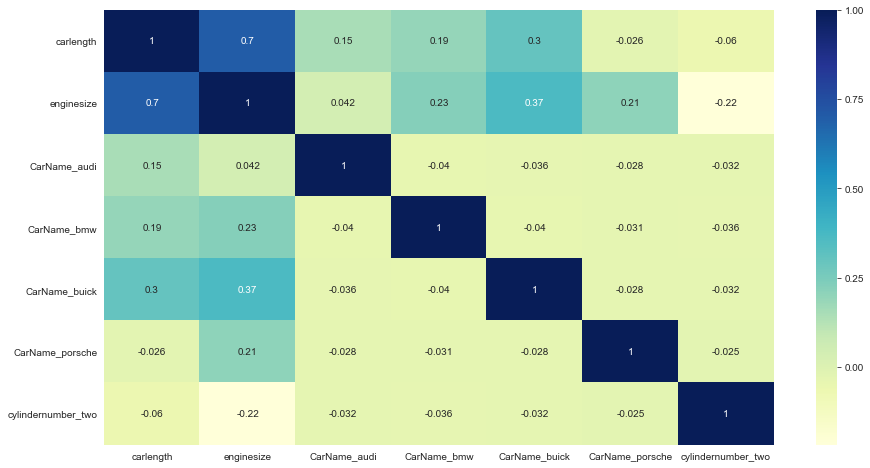

In [78]:
plt.figure(figsize = (15,8))
sns.heatmap(X.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### Variable `carlength` and `enginesize` have high VIF and correlation(0.7), let's drop `carlength` as it has relatively low coefficient with `price`

In [79]:
X = X.drop('carlength', axis =1)

# Build tenth fitted model
X_train_sm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_sm).fit()


#print the summmary
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     169.7
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           1.35e-60
Time:                        18:23:05   Log-Likelihood:                 169.83
No. Observations:                 143   AIC:                            -325.7
Df Residuals:                     136   BIC:                            -304.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0674      0

In [80]:
# Calculate the VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
0,enginesize,1.4200
3,CarName_buick,1.1700
2,CarName_bmw,1.1200
4,CarName_porsche,1.0800
1,CarName_audi,1.0500
5,cylindernumber_two,1.0000


## Final Model Observations

1. The R-Squared value is 0.882. This suggests that the model expains the 88% of the data
2. Also, the adjusted R-Squared in 0.877(87%), which is also good. There is minimal difference R-Squared and Adj R-Squared
3. All the variables have very low P-value(0).
4. F-Statistics is high(169) and its probality of F-Statistics is extremely low.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [81]:
# Calculate y_train_pred
y_train_pred = lr_10.predict(X_train_sm)

In [82]:
res = y_train - y_train_pred

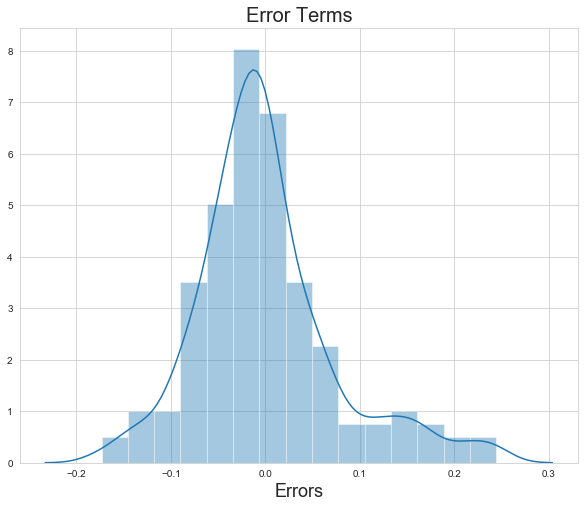

In [83]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (10,8))
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Make Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. tenth model.

#### Apply the scaling on the test sets

In [84]:

# Get the columnsc to normaise, into a list
col_to_norm = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']

df_test[col_to_norm] = scaler.transform(df_test[col_to_norm])

#Verify the dataset
df_test.head()


,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.4000,1,1,0,1,0.4098,0.4602,0.1396,0.4048,0.4242,0.1250,0.0917,0.2653,0.6944,0.0724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
186,0.8000,1,1,0,1,0.4976,0.6991,0.1811,0.4048,0.6111,0.1250,0.1542,0.4490,0.3889,0.0933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
59,0.6000,1,1,1,1,0.5967,0.5221,0.2302,0.5635,0.6061,0.1000,0.1500,0.2653,0.3611,0.1030,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
165,0.6000,1,1,1,1,0.4488,0.4248,0.1396,0.4444,0.4495,0.1500,0.2667,1.0000,0.3611,0.1155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
140,0.8000,1,1,1,1,0.2634,0.6991,0.1774,0.7460,0.2273,0.1062,0.1042,0.1020,0.3611,0.0687,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


#### Divide into X_test and y_test

In [85]:
y_test = df_test.pop('price')
X_test = df_test

In [86]:
# Now let's use our model to make predictions.

# Create X_test_new dataframe by dropping variables from X_test or only taking the variables from the final model(lr_10)
X_test_new = X_test[X.columns]

In [87]:
# Add constant variable to test dataframe
X_test_new_sm = sm.add_constant(X_test_new)

In [88]:
# Make predictions
y_pred = lr_10.predict(X_test_new_sm)

# Model Evaluation

Let's now plot the graph for actual versus predicted values.

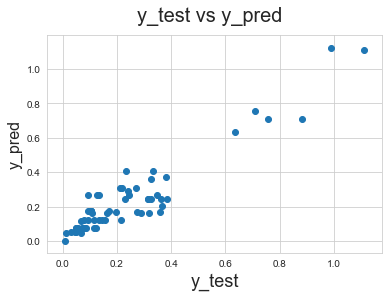

In [89]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)
plt.show()

It is evident in the above scatter plot the error terms are randomly distributed and there is no pattern. 
I believe , we are good to go with this model, which has both adjusted R square and R square close to 0.88

Lets check the R-Squared Score

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8793705103978109

# Conclusion

It is evident from the scatter plot(y_test Vs y_pred) tha the error terms are randomly distributed and there is no pattern.

The R2 Score value is 0.8793705103978109.

Equation of the best fit line is:

$ price = 1.0430 \times enginesize + 0.1478 \times CarName\_audi + 0.2408 \times CarName\_bmw + 0.2200 \times CarName\_buick + 0.2524 \times CarName\_porsche + 0.2405 \times cylindernumber\_two $ 

As we can see that the model seems to be stable, The variables that can affect price are:

1. enginesize
2. CarName_buick
3. CarName_porsche 
4. CarName_bmw
5. CarName_audi
6. cylindernumber_two